# Importing Dependencies

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import joblib

In [2]:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
import matplotlib
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

import sklearn
print("Scikit-learn version:", sklearn.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.3
Seaborn version: 0.13.2
Scikit-learn version: 1.4.1.post1


# Importing Data & visualising data

In [3]:
df = pd.read_csv('yield_df.csv')
df.head()

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

In [6]:
df.shape

(28242, 7)

In [7]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [9]:
df.duplicated().sum()

2310

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  25932.000000   25932.000000                   25932.000000   
mean    2001.556455   76978.132925                    1146.836688   
std        7.055924   84647.605552                     717.391098   
min     1990.000000      50.000000                      51.000000   
25%     1995.000000   19996.000000                     593.000000   
50%     2001.000000   39530.000000                    1083.000000   
75%     2008.000000  104168.000000                    1668.000000   
max     2013.000000  501412.000000                    3240.000000   

       pesticides_tonnes      avg_temp  
count       25932.000000  25932.000000  
mean        34782.573241     20.422251  
std         57228.568244      6.439402  
min             0.040000      1.300000  
25%          1597.000000     16.580000  
50%         15373.000000     21.420000  
75%         45620.000000     26.060000  
max        367778.000000     30.650000

In [13]:
corr = df.corr(numeric_only=True)
corr

Year  hg/ha_yield  \
Year                           1.000000     0.091327   
hg/ha_yield                    0.091327     1.000000   
average_rain_fall_mm_per_year -0.006423    -0.004067   
pesticides_tonnes              0.135127     0.065523   
avg_temp                       0.013701    -0.110400   

                               average_rain_fall_mm_per_year  \
Year                                               -0.006423   
hg/ha_yield                                        -0.004067   
average_rain_fall_mm_per_year                       1.000000   
pesticides_tonnes                                   0.161483   
avg_temp                                            0.333694   

                               pesticides_tonnes  avg_temp  
Year                                    0.135127  0.013701  
hg/ha_yield                             0.065523 -0.110400  
average_rain_fall_mm_per_year           0.161483  0.333694  
pesticides_tonnes                       1.000000  0.045577  
avg_temp                                0.045577  1.000000

<Axes: >

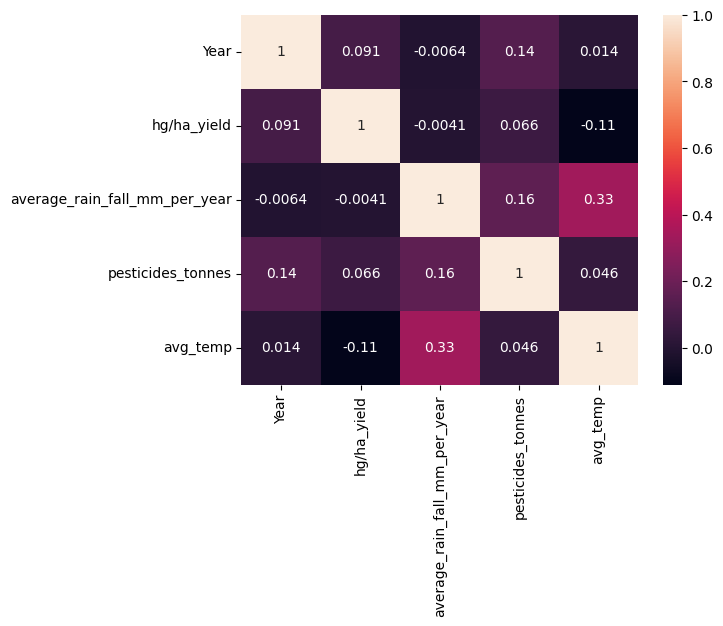

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cbar=True)

### **Readings from the Correlation Heatmap**:

1. **Strongest Positive Correlations**:
   - **Average Rainfall and Average Temperature (0.33)**: Indicates that higher rainfall is generally associated with higher temperatures.
   - **Pesticides Usage and Average Rainfall (0.16)**: A moderate positive correlation, suggesting that areas with more rainfall tend to use slightly more pesticides.

2. **Negative Correlations**:
   - **Hg/ha Yield and Average Temperature (-0.11)**: A weak negative correlation, meaning that higher temperatures might slightly reduce crop yield.
   - **Average Rainfall and Hg/ha Yield (-0.0041)**: No significant impact of rainfall on yield.
   - **Year and Average Rainfall (-0.0064)**: No significant trend in rainfall changes over time.

3. **Near-Zero or Insignificant Correlations**:
   - **Year and Yield (0.091)**: Minimal impact of the year on crop yield.
   - **Pesticides and Yield (0.066)**: A very weak relationship, suggesting that increased pesticide usage does not significantly impact yield.
   - **Year and Temperature (0.014)**: Almost no relationship, indicating temperature variations are not strongly linked to time progression.

In [15]:
all_floats = df['average_rain_fall_mm_per_year'].apply(lambda x: isinstance(x, float)).all()
print("Are all values float?:", all_floats)

Are all values float?: True


In [16]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

<Axes: xlabel='count', ylabel='Area'>

In [17]:
print(len(df['Area']))
print(len(df['Area'].unique()))

25932
101


In [18]:
countries = (df['Area'].unique())

In [19]:
df['Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [20]:
df['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [21]:
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013], dtype=int64)

In [22]:
# Calculate the range of a column
column_name = 'average_rain_fall_mm_per_year'
column_range = df[column_name].max() - df[column_name].min()

print(f"The range of the column '{column_name}' is: {column_range}")

The range of the column 'average_rain_fall_mm_per_year' is: 3189.0


In [23]:
df.head(1)

Area   Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania  Maize  1990        36613                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37

In [24]:
df['average_rain_fall_mm_per_year'] = pd.to_numeric(df['average_rain_fall_mm_per_year'], errors='coerce')

In [25]:
for country in countries:
    print(country)

Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Belarus
Belgium
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cameroon
Canada
Central African Republic
Chile
Colombia
Croatia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Eritrea
Estonia
Finland
France
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Honduras
Hungary
India
Indonesia
Iraq
Ireland
Italy
Jamaica
Japan
Kazakhstan
Kenya
Latvia
Lebanon
Lesotho
Libya
Lithuania
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Montenegro
Morocco
Mozambique
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Norway
Pakistan
Papua New Guinea
Peru
Poland
Portugal
Qatar
Romania
Rwanda
Saudi Arabia
Senegal
Slovenia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Tajikistan
Thailand
Tunisia
Turkey
Uganda
Ukraine
United Kingdom
Uruguay
Zambia
Zimbabwe


In [26]:
# Finding total yield per country

yield_per_country = []
for country in countries:
    yield_per_country.append(df[df['Area']==country]['hg/ha_yield'].sum())

In [27]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

In [28]:
plt.figure(figsize=(10,20))
sns.barplot(y=countries,x=yield_per_country)

<Axes: >

<Axes: xlabel='count', ylabel='Item'>

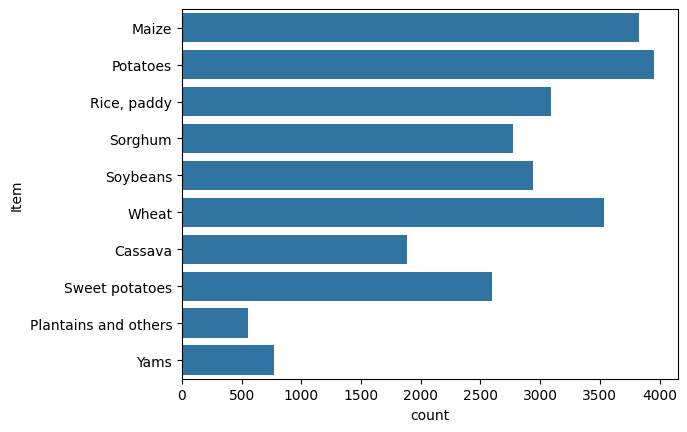

In [29]:
sns.countplot(y=df['Item'])

In [30]:
# Finding total yield per crop

crops = (df['Item'].unique())

In [31]:
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

In [32]:
yield_per_crop

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

<Axes: >

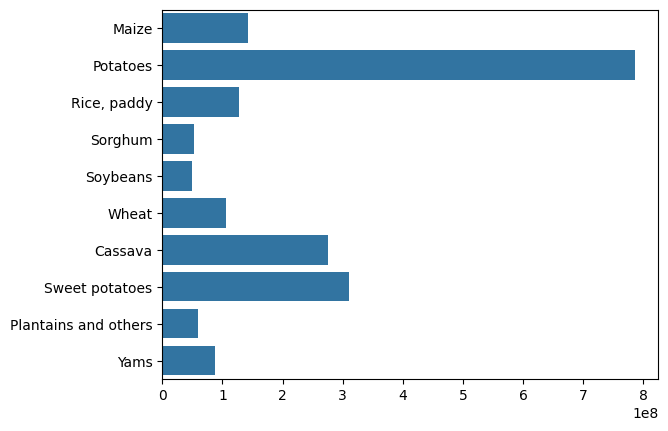

In [33]:
sns.barplot(y=crops,x=yield_per_crop)

# Train test split

In [34]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]

In [35]:
df.head()

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp     Area  \
0  1990                         1485.0              121.0     16.37  Albania   
1  1990                         1485.0              121.0     16.37  Albania   
2  1990                         1485.0              121.0     16.37  Albania   
3  1990                         1485.0              121.0     16.37  Albania   
4  1990                         1485.0              121.0     16.37  Albania   

          Item  hg/ha_yield  
0        Maize        36613  
1     Potatoes        66667  
2  Rice, paddy        23333  
3      Sorghum        12500  
4     Soybeans         7000

In [36]:
X = df.drop(['Year', 'hg/ha_yield'], axis=1)
y = df['hg/ha_yield']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [38]:
X_train.shape

(20745, 5)

In [39]:
X_train

average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
4907                           608.0            2232.25      8.58   
10399                          589.0            7715.00     10.34   
23617                          854.0            8985.00     15.33   
16174                         2051.0             909.71     27.51   
9077                           700.0           40740.64     10.88   
...                              ...                ...       ...   
14326                         1083.0           52980.00     25.09   
21268                         1732.0            4170.00     13.28   
10415                          589.0            5280.00     10.35   
11542                         1083.0           61257.00     25.92   
2955                          1761.0           84312.78     26.90   

              Area            Item  
4907      Bulgaria        Soybeans  
10399      Hungary           Wheat  
23617     Portugal     Rice, paddy  
16174      Jamaica  Sweet potatoes  
9077       Germany           Maize  
...            ...             ...  
14326        India        Soybeans  
21268  New Zealand           Maize  
10415      Hungary         Sorghum  
11542        India           Wheat  
2955        Brazil           Maize  

[20745 rows x 5 columns]

In [40]:
X_test.shape

(5187, 5)

In [41]:
y_train

4907      22239
10399     41644
23617     52273
16174    170818
9077      94475
          ...  
14326     13530
21268     76544
10415     20486
11542     25590
2955      23629
Name: hg/ha_yield, Length: 20745, dtype: int64

In [42]:
y_train.shape

(20745,)

# Data Preprocessing

### Onehotencoding and scaling

In [43]:
X_train.head(1)

average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp      Area  \
4907                          608.0            2232.25      8.58  Bulgaria   

          Item  
4907  Soybeans

In [44]:
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, [0, 1, 2]),  # Numeric columns
        ('OHE', ohe, [3, 4])  # Categorical columns
    ],
    remainder='passthrough'
)

In [45]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(), [0, 1, 2]),
                                ('OHE', OneHotEncoder(drop='first'), [3, 4])])

In [55]:
joblib.dump(preprocessor, "crop_yield_preprocessor.pkl")

['crop_yield_preprocessor.pkl']

In [56]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [57]:
X_train_transformed

<20745x112 sparse matrix of type '<class 'numpy.float64'>'
	with 102120 stored elements in Compressed Sparse Row format>

# Model Training

In [65]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Knr':KNeighborsRegressor(),
    'Dtr':DecisionTreeRegressor()
}

In [66]:
# Dictionary to store results
results = {}

# Model evaluation loop
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R² Score': r2}

# Model Evaluation

In [67]:
# Print results in a structured format
for model, metrics in results.items():
    print(f"\n{model} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


lr Performance:
MAE: 30250.1323
MSE: 1873543153.0943
RMSE: 43284.4447
R² Score: 0.7395

lss Performance:
MAE: 30227.7666
MSE: 1873338461.1080
RMSE: 43282.0801
R² Score: 0.7395

Rid Performance:
MAE: 30194.1038
MSE: 1873651338.9982
RMSE: 43285.6944
R² Score: 0.7395

Knr Performance:
MAE: 8697.3993
MSE: 336175623.2035
RMSE: 18335.0927
R² Score: 0.9533

Dtr Performance:
MAE: 6780.7714
MSE: 337440101.2031
RMSE: 18369.5428
R² Score: 0.9531


In [68]:
# Train Decision Tree separately
dtr = DecisionTreeRegressor()
dtr.fit(X_train_transformed, y_train)
y_pred_dtr = dtr.predict(X_test_transformed)

In [69]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_dtr, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.legend()
plt.show()

# Predictive system

In [70]:
import numpy as np
import pandas as pd

def prediction(average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create a DataFrame to match the training format
    features = pd.DataFrame({
        'average_rain_fall_mm_per_year': [average_rain_fall_mm_per_year],
        'pesticides_tonnes': [pesticides_tonnes],
        'avg_temp': [avg_temp],
        'Area': [Area],
        'Item': [Item]
    })

    # Transform the features using the preprocessor
    transformed_features = preprocessor.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features)

    print(predicted_yield)
    return predicted_yield[0]

# Example Input
average_rain_fall_mm_per_year = 1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'

result = prediction(average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

[36613.]


In [63]:
print(result)

[36613.]


# Model Saving

In [64]:
import pickle
pickle.dump(dtr,open('crop_yield_dtr.pkl','wb'))